## Анализ данных сервиса самокатов и проверка гипотез дял бизнеса.

# Опишем цель работы:
Помочь бизнесу понять тратят ли пользователи с подпиской больше времени на поездки. 

Проверить, проезжают ли пользователи рекомендуемое среднее расстояние для износа самоката(техническое число).

Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Вкратце: изучить данные, сделать анализ и предоставить руководству сводку с првоеренными гипотезами для того, чтобы повысить прибыль(разумеется)

## Для начала 
подгрузим все либы, передадим в переменные все csv файлы с юзерами, поездками и с описанием двух типов подписки(бесплатная и сама подписка)

# Загрузка данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import pandas as pd 

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')

In [3]:
data_rides = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])

In [4]:
data_subs = pd.read_csv('/datasets/subscriptions_go.csv')

Глянем через первые 10 строк, info и describe инфу по всем этим таблицам

In [5]:
data_users.info()
data_users.head(10)
data_users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


### с виду все норм

### В принципе все переменные соответствуют типам, int64 для age много, но оставлю)

In [6]:
data_rides.info()
data_rides.head(10)
data_rides.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


### Все типы в принципе норм, крое даты, ее приведу к date. Расстояние и duration приводить к инту пока не буду, мб будет влиять на точность

In [7]:
data_rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


### с виду все норм

In [8]:
data_subs.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
data_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


### все типы соответствуют переменным

In [10]:
data_subs.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


### Вроде выглядит нормально

In [11]:
data_users[data_users['user_id'].isna() == False]

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


In [12]:
data_users[data_users['user_id'] == 1534]

,user_id,name,age,city,subscription_type
1533,1534,Альберт,25,Краснодар,free


## В целом, данные в порядке, за искючением даты

# Предобработка данных

In [13]:
data_rides["date"].min(), data_rides["date"].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-30 00:00:00'))

Рассматриваем период за 21 год,"ытс окэй" ✅

### Выкинем месяц в отдельный столбец)

In [14]:
data_rides['month'] = data_rides["date"].dt.month

In [15]:
data_rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


### Чекаем пропуски и дубликаты

In [16]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

В users Явных na нет

In [17]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

В rides Явных na нет

In [18]:
data_subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В subs Явных na нет

In [19]:
data_rides[data_rides.duplicated() == True]

,user_id,distance,duration,date,month


In [20]:
data_users[data_users['user_id'].duplicated() == True].sort_values(by = 'user_id')

,user_id,name,age,city,subscription_type
1535,16,Амалия,27,Краснодар,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
1555,72,Никита,25,Москва,ultra
1549,108,Влада,29,Тюмень,ultra
1553,121,Алина,25,Пятигорск,ultra
1540,127,Павел,25,Пятигорск,ultra
1548,136,Марсель,25,Тюмень,ultra
1543,153,Герман,23,Москва,ultra
1542,204,Руслан,30,Пятигорск,ultra


In [21]:
data_users[data_users['user_id'].duplicated() == True].count()

user_id              31
name                 31
age                  31
city                 31
subscription_type    31
dtype: int64

In [22]:
data_users[data_users['user_id'] == 16]

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra


Действительно, явные дубликаты есть

In [23]:
data_users[data_users.duplicated() == True].count()

user_id              31
name                 31
age                  31
city                 31
subscription_type    31
dtype: int64

In [24]:
data_users = data_users.drop_duplicates()

In [25]:
data_users[data_users.duplicated() == True].count()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

users без явных дубликатов

## В целом данные пришли хорошего качества, были явные дубликаты, от которых мы избавились. Данные замечательные!

# EDA

### Попробую описать и визуализировать общую информацию о пользователях и поездках

## Частота встречаемости городов

In [26]:
cities_unique = data_users['city'].value_counts()

In [27]:
cities_unique

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [28]:
city_freq = cities_unique / cities_unique.sum() * 100

In [29]:
city_freq

Пятигорск         14.276402
Екатеринбург      13.298566
Ростов-на-Дону    12.907432
Краснодар         12.581486
Сочи              12.320730
Омск              11.929596
Тюмень            11.734029
Москва            10.951760
Name: city, dtype: float64

Частота в процентах Done ✅. 

Преобладает Пятигорск, Екатеринбург и Ростов,  все города в диапозоне 10.95-14.27 %

может быть такая ситуация, что сервис начинал с Пятигорска, целевой аудитории больше + в Москве развита сеть аренд, что уменьшает потенциальную аудиторию. И если это не закономерность. а ошибка - решить её корректно я ,наверное, не смогу, только мудрёным фильтром по параметрам из df(и то. если это возможно), тут уже нужно будет передать ребятам в прод, чтобы они посмотрели у себя ошибки по записи данных

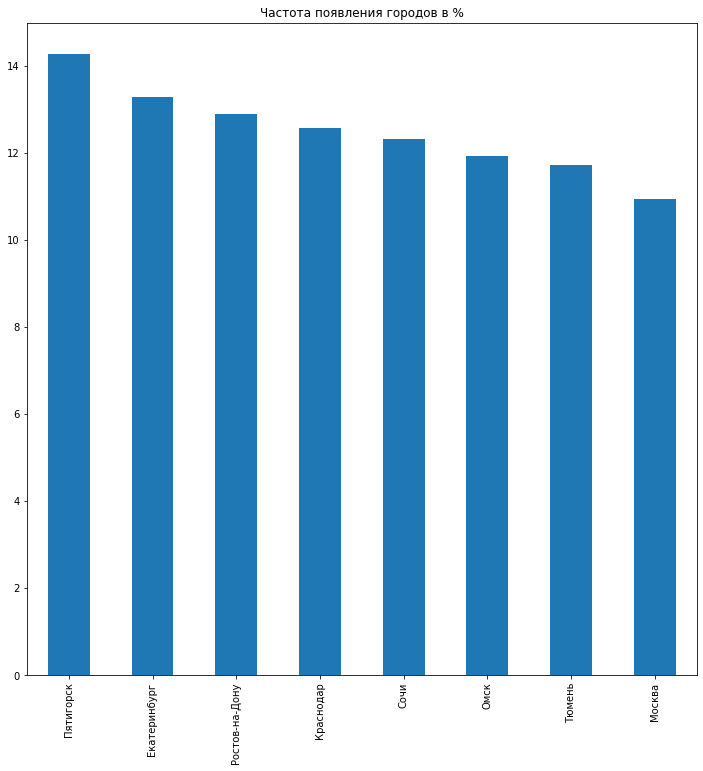

In [30]:
city_freq.plot(kind ='bar', figsize=(12,12))
plt.title('Частота появления городов в %')
plt.show()

## соотношение пользователей с подпиской и без подписки

In [31]:
count_subs = data_users['subscription_type'].value_counts()
count_subs /= count_subs.sum()
count_subs

free     0.544329
ultra    0.455671
Name: subscription_type, dtype: float64

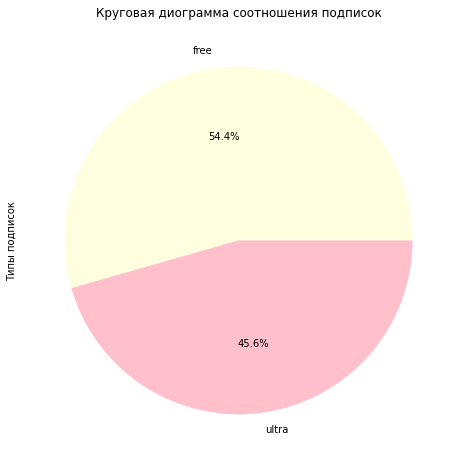

In [32]:
count_subs.plot(kind = 'pie', autopct='%1.1f%%',figsize=(8,8),colors = ['lightyellow','pink'])
plt.title('Круговая диограмма соотношения подписок')
plt.ylabel('Типы подписок')
plt.show()

#### Больше людей ездят без подписки, хотя 54 и 46 процента +- равносильно

## возраст пользователей

In [33]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [34]:
freq_age = data_users['age'].value_counts()

freq_age_df = freq_age.reset_index()

freq_age_df.columns = ['возраст', 'частота']

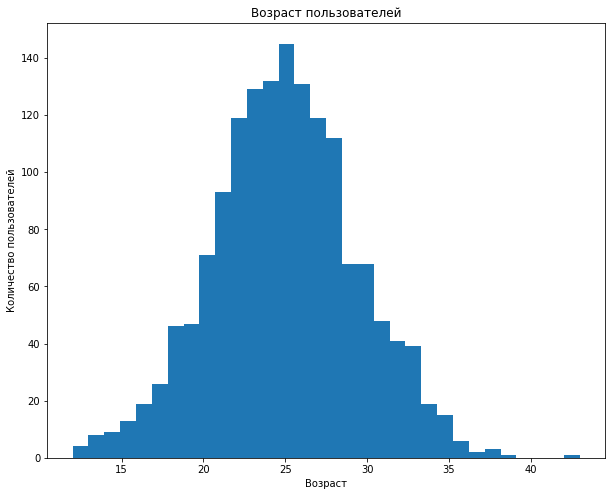

In [35]:
data_users['age'].plot(kind = 'hist',figsize = (10,8),bins = 32)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

#### Из describe и графика можно сказать, что чаще среди пользователй встречается возраст 25 лет, самый старший пользователь - 43, младший - 12.в 25 - 75 процентиль входят люди от 22 до 28 лет. Распределение похоже на нормальное

## расстояние, которое пользователь преодолел за одну поездку

In [36]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

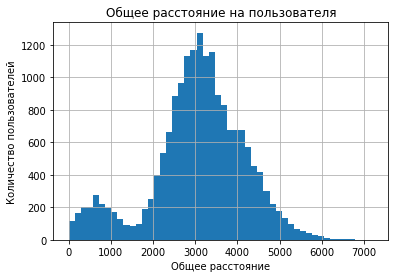

In [37]:
distances = data_rides['distance']
distances.hist(bins=50)
plt.title('Общее расстояние на пользователя')
plt.xlabel('Общее расстояние')
plt.ylabel('Количество пользователей')
plt.show()

In [38]:
data_rides[data_rides['distance'] < 600]

,user_id,distance,duration,date,month
197,21,518.341543,10.151870,2021-02-03,2
204,21,517.912395,14.219625,2021-10-01,10
228,24,409.829089,10.294197,2021-04-04,4
406,44,504.654111,4.513962,2021-01-25,1
463,50,307.532350,6.230129,2021-08-05,8
...,...,...,...,...,...
18007,1531,450.981518,15.591699,2021-02-14,2
18018,1531,375.107762,5.406654,2021-06-27,6
18031,1532,303.787850,7.792490,2021-05-21,5
18043,1533,310.488247,10.642389,2021-02-21,2


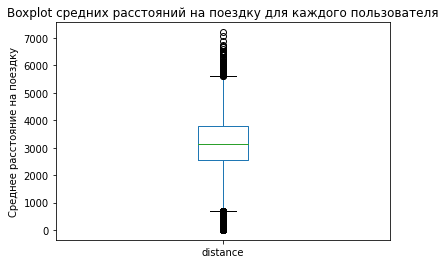

In [39]:
distances.plot(kind='box')
plt.title('Boxplot средних расстояний на поездку для каждого пользователя')
plt.ylabel('Среднее расстояние на поездку')
plt.show()

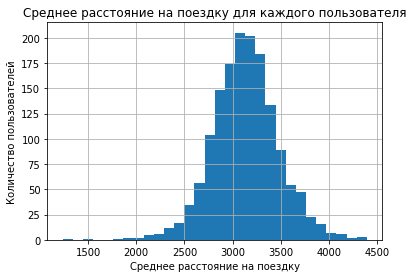

In [40]:
# и второй вариант
# среднее расстояние на поездку для каждого пользователя
average_distance_per_user = data_rides.groupby('user_id')['distance'].median()

average_distance_per_user.hist(bins=30)
plt.title('Среднее расстояние на поездку для каждого пользователя')
plt.xlabel('Среднее расстояние на поездку')
plt.ylabel('Количество пользователей')
plt.show()

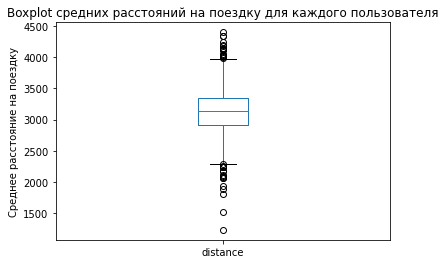

In [41]:
average_distance_per_user.plot(kind='box')
plt.title('Boxplot средних расстояний на поездку для каждого пользователя')
plt.ylabel('Среднее расстояние на поездку')
plt.show()

#### В среднем пользователи проезжают чуть больше 3км(3133м), есть значения больше 7км, есть меньше 1 километра, на графике виден "мини-максимум" в части пользователей(около 200 пользователей проезжают меньше км, около 800 метров),может быть, нужно быстро добраться куда-то, опаздывают, ногу сломали, а добраться нужно и т.д

## продолжительность поездок

In [42]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

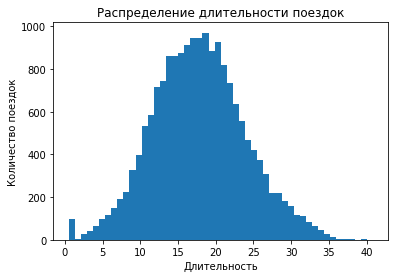

In [43]:
data_rides['duration'].plot(kind = 'hist',bins = 50)
plt.title('Распределение длительности поездок')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.show()

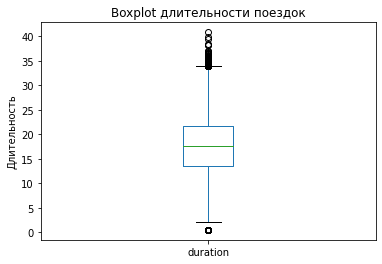

In [44]:
data_rides['duration'].plot(kind='box')
plt.title('Boxplot длительности поездок')
plt.ylabel('Длительность')
plt.show()

В среднем поездка занимает 17.67 минуты, есть большие значения больше получаса, и маленькие, меньше 1 минуты. Это могут быть выбросы, либо те самые "лихачи", котоыре проезжают по 800 метров и делают такой выброс

In [45]:
data_rides[(data_rides['duration'] < 0.5001)&(data_rides['distance']<5000)]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6883,726,4452.491518,0.5,2021-03-01,3
7018,735,4406.954812,0.5,2021-04-13,4
7364,760,4881.391865,0.5,2021-08-29,8
7437,766,4539.088310,0.5,2021-12-22,12
7508,772,4718.820996,0.5,2021-05-22,5
8329,836,4958.922077,0.5,2021-01-12,1
8472,847,4770.172208,0.5,2021-03-26,3


In [46]:
data_rides[(data_rides['duration'] < 0.5001)&(data_rides['distance']<500)]

,user_id,distance,duration,date,month


Экспериментальным путем были выявлены записи, где расстояние больше 4 км, а длительность СТРОГО полсекунды - скорее всего, это 0.5 часа и длительность поездки округлилась до 30 минут, либо закончились деньги на поездку. 95 записей из 18 тысяч = 0.5% от общей информации, так что удалим эти записи и оставим только приблизительно нормально описывающие всю совокупность

In [47]:
data_rides = data_rides[data_rides['duration'] != 0.5]


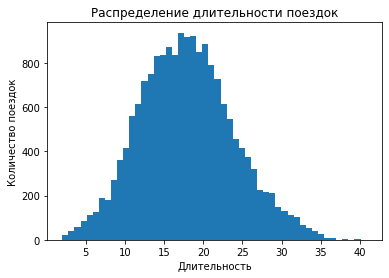

In [48]:
data_rides['duration'].plot(kind = 'hist',bins = 50)
plt.title('Распределение длительности поездок')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.show()

Стало получшe

In [49]:
data_rides['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

#### средняя продолжительность поездки чуть выросла(мат ожидание, получается) до 17.71 с 17.69. Основная часть поездок укладывается в 14-22 минуту.На вид данные имеют Гауссовское распределение.

## Итог
### 1.Частота встречаемости городов
#### Преобладает Пятигорск, Екатеринбург и Ростов,  все города в диапозоне 10.95-14.27 %
### 2.соотношение пользователей с подпиской и без подписки
#### Больше людей ездят без подписки, чем с подпской. Соотношение 54.4% и 45.6%
### 3.возраст пользователей
#### чаще среди пользователей встречается возраст 25 лет, самый старший пользователь - 43, младший - 12.Основной возраст пользователей от 22 до 28 лет
### 4.расстояние, которое пользователь преодолел за одну поездку
#### В среднем пользователи проезжают чуть больше 3км(3133м), есть значения больше 7км, есть меньше 1 километра,около 200 пользователей проезжают #меньше км, около 800 метров,может быть, нужно быстро добраться куда-то, опаздывают, ногу сломали, а добраться нужно и т.д
### 5.продолжительность поездок
#### средняя продолжительность поездки равна 17.71 минут. Основная часть поездок укладывается в 14-22 минуты.

## Объединение данных

### Три df круто, а одна сводная таблица - лучше

In [50]:
merged_users_and_rides = data_users.merge(data_rides,on = 'user_id',how = 'left')
merged_users_and_rides

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


In [51]:
# Перекину колонку с подпиской в конец, так удобнее
columns = [col for col in merged_users_and_rides.columns if col != 'subscription_type']

columns.append('subscription_type')

merged_users_and_rides = merged_users_and_rides[columns]
merged_users_and_rides

,user_id,name,age,city,distance,duration,date,month,subscription_type
0,1,Кира,22,Тюмень,4409.919140,25.599769,2021-01-01,1,ultra
1,1,Кира,22,Тюмень,2617.592153,15.816871,2021-01-18,1,ultra
2,1,Кира,22,Тюмень,754.159807,6.232113,2021-04-20,4,ultra
3,1,Кира,22,Тюмень,2694.783254,18.511000,2021-08-11,8,ultra
4,1,Кира,22,Тюмень,4028.687306,26.265803,2021-08-28,8,ultra
...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,3781.098080,19.822962,2021-11-04,11,free
17969,1534,Альберт,25,Краснодар,2840.423057,21.409799,2021-11-16,11,free
17970,1534,Альберт,25,Краснодар,3826.185507,18.435051,2021-11-18,11,free
17971,1534,Альберт,25,Краснодар,2902.308661,16.674362,2021-11-27,11,free


In [52]:
pivot_df = merged_users_and_rides.merge(data_subs,on ='subscription_type',how = 'left')
pivot_df

,user_id,name,age,city,distance,duration,date,month,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,4409.919140,25.599769,2021-01-01,1,ultra,6,0,199
1,1,Кира,22,Тюмень,2617.592153,15.816871,2021-01-18,1,ultra,6,0,199
2,1,Кира,22,Тюмень,754.159807,6.232113,2021-04-20,4,ultra,6,0,199
3,1,Кира,22,Тюмень,2694.783254,18.511000,2021-08-11,8,ultra,6,0,199
4,1,Кира,22,Тюмень,4028.687306,26.265803,2021-08-28,8,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,3781.098080,19.822962,2021-11-04,11,free,8,50,0
17969,1534,Альберт,25,Краснодар,2840.423057,21.409799,2021-11-16,11,free,8,50,0
17970,1534,Альберт,25,Краснодар,3826.185507,18.435051,2021-11-18,11,free,8,50,0
17971,1534,Альберт,25,Краснодар,2902.308661,16.674362,2021-11-27,11,free,8,50,0


Симпатишно😏

Проверим на корректность объединения

In [53]:
pivot_df['user_id'].count() == merged_users_and_rides['user_id'].count()

True

In [54]:
pivot_df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
distance             0
duration             0
date                 0
month                0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Данные объединились корректно

### Теперь отделим пользователей free от ultra, раскидаем на разные df

Создам отдельные df для free и для ultra

In [55]:
# для free
df_free = pivot_df[pivot_df['subscription_type']=='free']
display(df_free['subscription_type'].unique())
display(df_free)

array(['free'], dtype=object)

,user_id,name,age,city,distance,duration,date,month,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,2515.690719,14.944286,2021-01-02,1,free,8,50,0
6501,700,Айдар,22,Омск,846.932642,16.234663,2021-02-01,2,free,8,50,0
6502,700,Айдар,22,Омск,4004.434142,20.016628,2021-02-04,2,free,8,50,0
6503,700,Айдар,22,Омск,1205.911290,9.782872,2021-02-10,2,free,8,50,0
6504,700,Айдар,22,Омск,3047.379435,17.427673,2021-02-14,2,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,3781.098080,19.822962,2021-11-04,11,free,8,50,0
17969,1534,Альберт,25,Краснодар,2840.423057,21.409799,2021-11-16,11,free,8,50,0
17970,1534,Альберт,25,Краснодар,3826.185507,18.435051,2021-11-18,11,free,8,50,0
17971,1534,Альберт,25,Краснодар,2902.308661,16.674362,2021-11-27,11,free,8,50,0


In [56]:
# для ultra
df_ultra = pivot_df[pivot_df['subscription_type']=='ultra']
display(df_ultra['subscription_type'].unique())
display(df_ultra)

array(['ultra'], dtype=object)

,user_id,name,age,city,distance,duration,date,month,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,4409.919140,25.599769,2021-01-01,1,ultra,6,0,199
1,1,Кира,22,Тюмень,2617.592153,15.816871,2021-01-18,1,ultra,6,0,199
2,1,Кира,22,Тюмень,754.159807,6.232113,2021-04-20,4,ultra,6,0,199
3,1,Кира,22,Тюмень,2694.783254,18.511000,2021-08-11,8,ultra,6,0,199
4,1,Кира,22,Тюмень,4028.687306,26.265803,2021-08-28,8,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,3973.046497,24.671163,2021-08-29,8,ultra,6,0,199
6496,699,Оксана,22,Москва,3288.702563,15.892886,2021-09-12,9,ultra,6,0,199
6497,699,Оксана,22,Москва,3076.159348,14.389525,2021-09-26,9,ultra,6,0,199
6498,699,Оксана,22,Москва,4707.845501,15.839579,2021-10-17,10,ultra,6,0,199


Записей в df_free 11568 против 6500 записй о поездках для пользователей в df_ultra, что похоже на правду, чаще всего пользователи берут самокаты на 1-2 поездки и поэтмоу нет мысла брать подписку(например. погулять по городу в отпуске или просто срочно добраться конкретно сейчас)

Проверим на пропуски после разделения

In [57]:
df_ultra.isna().sum(), df_free.isna().sum()

(user_id              0
 name                 0
 age                  0
 city                 0
 distance             0
 duration             0
 date                 0
 month                0
 subscription_type    0
 minute_price         0
 start_ride_price     0
 subscription_fee     0
 dtype: int64,
 user_id              0
 name                 0
 age                  0
 city                 0
 distance             0
 duration             0
 date                 0
 month                0
 subscription_type    0
 minute_price         0
 start_ride_price     0
 subscription_fee     0
 dtype: int64)

It's ok

### Посмотрим, сколько проезжает две категории(подбираемся к гипотезам...)

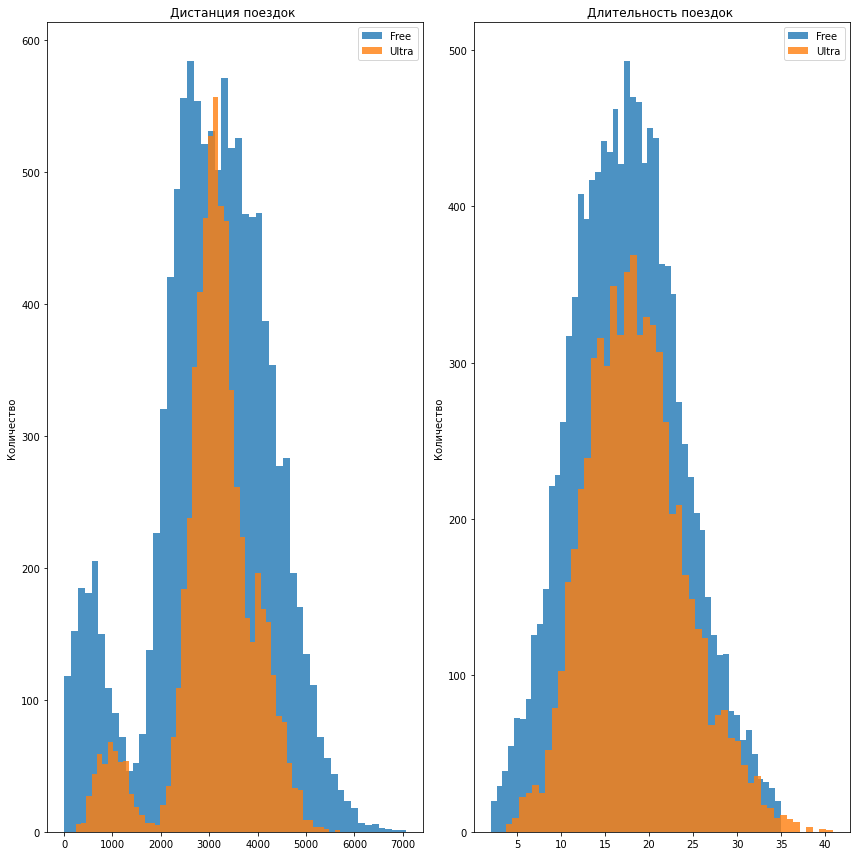

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
axes[0].hist(df_free['distance'],bins = 50, alpha=0.8, label='Free')
axes[0].hist(df_ultra['distance'],bins = 50, alpha=0.8, label = 'Ultra')
axes[0].set_title('Дистанция поездок ')
axes[0].set_ylabel('Количество')
axes[0].legend()
plt.grid()
axes[1].hist(df_free['duration'],bins = 50, alpha=0.8, label='Free')
axes[1].hist(df_ultra['duration'],bins = 50, alpha=0.8, label = 'Ultra')
axes[1].set_title('Длительность поездок ')
axes[1].set_ylabel('Количество')
axes[1].legend()
plt.tight_layout()
plt.grid()
plt.show()

Распределение длительности поездок:

Для обеих категорий пользователей (с подпиской и без подписки) длительность поездок, судя по графикам, имеет распределение, похожее на нормальное.
Большинство поездок длятся от 5 до 30 минут, с пиком около 15-25 минут.
Это может указывать на то, что пользователи предпочитают короткие поездки, возможно, используя самокаты для быстрых поездок на короткие расстояния, например, от метро до дома или от работы до обеденного места.

Распределение дистанции поездок:

Графики показывают, что большинство поездок имеют дистанцию в пределах от 0 до примерно 2000-2500 метров.

Есть заметный "хвост" на графиках дистанции, что указывает на наличие более длинных поездок, но их значительно меньше, чем коротких.

Наличие длинного хвоста в распределении дистанции поездок указывает на то, что хотя большинство поездок являются короткими, существует заметное количество поездок на большие расстояния. Это может быть связано с использованием самокатов для разных целей, включая, например, досуг или поездки на работу.

Более обще: пользователи имеют хожие цели аренды самокатов.

In [59]:
df_free.describe(), df_ultra.describe()

(            user_id           age      distance      duration         month  \
 count  11473.000000  11473.000000  11473.000000  11473.000000  11473.000000   
 mean    1120.761701     24.888782   3028.374239     17.530771      6.523316   
 std      241.138659      4.482066   1235.541051      6.162609      3.447707   
 min      700.000000     12.000000      0.855683      2.035632      1.000000   
 25%      915.000000     22.000000   2360.878149     13.085688      4.000000   
 50%     1123.000000     25.000000   3102.083025     17.383807      7.000000   
 75%     1329.000000     28.000000   3883.979311     21.638038      9.000000   
 max     1534.000000     43.000000   7066.003772     34.948498     12.000000   
 
        minute_price  start_ride_price  subscription_fee  
 count       11473.0           11473.0           11473.0  
 mean            8.0              50.0               0.0  
 std             0.0               0.0               0.0  
 min             8.0              50.0    

В среднем пользователи сподпиской проезжают большее расстояние: 3115.445388 метров,против free -3028.374239б метров,

длительность поездки в среднем больше у пользователей с подпиской 18.541985 минут, против 17.530771 минут у пользователей без подписки  

Это может говорить о целесообразности привлекать новых пользователей приобретать подписку

## Считаем выручку

### Создать df с агрегированными данными о поездках на основе датафрейма с объединёнными данными: 
#### найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [60]:
agg_df_profit = pivot_df.groupby(['user_id','month']
                                ).agg(total_dist = ('distance','sum'),
                                                          amount_rides = ('distance','count'),
                                                          total_dur =('duration','sum')).reset_index()
display(agg_df_profit.info())
agg_df_profit.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11300 entries, 0 to 11299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       11300 non-null  int64  
 1   month         11300 non-null  int64  
 2   total_dist    11300 non-null  float64
 3   amount_rides  11300 non-null  int64  
 4   total_dur     11300 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 441.5 KB


None

,user_id,month,total_dist,amount_rides,total_dur
0,1,1,7027.511294,2,41.416640
1,1,4,754.159807,1,6.232113
2,1,8,6723.470560,2,44.776802
3,1,10,5809.911100,2,31.578017
4,1,11,7003.499363,3,53.397424
5,1,12,6751.629942,2,27.203912
6,2,3,10187.723006,3,60.959959
7,2,4,6164.381824,2,39.048633
8,2,6,3255.338202,1,13.851127
9,2,7,6780.722964,2,46.170157


Вроде норм

In [61]:
agg_df_profit.isna().sum()

user_id         0
month           0
total_dist      0
amount_rides    0
total_dur       0
dtype: int64

Пропусков нет, работаем

### В этот же датафрейм посчитаю выручку в столбец с помесячной выручкой, которую принёс каждый пользователь. 
#### Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа 

In [62]:
agg_df_profit['total_dur'] = np.ceil(agg_df_profit['total_dur'])

In [63]:
display(agg_df_profit)

,user_id,month,total_dist,amount_rides,total_dur
0,1,1,7027.511294,2,42.0
1,1,4,754.159807,1,7.0
2,1,8,6723.470560,2,45.0
3,1,10,5809.911100,2,32.0
4,1,11,7003.499363,3,54.0
...,...,...,...,...,...
11295,1534,6,3409.468534,2,25.0
11296,1534,8,7622.453034,2,48.0
11297,1534,9,4928.173852,1,23.0
11298,1534,11,13350.015305,4,77.0


In [64]:
pivot_df['round_dur'] = np.ceil(pivot_df['duration'])
pivot_df.head(10)

,user_id,name,age,city,distance,duration,date,month,subscription_type,minute_price,start_ride_price,subscription_fee,round_dur
0,1,Кира,22,Тюмень,4409.919140,25.599769,2021-01-01,1,ultra,6,0,199,26.0
1,1,Кира,22,Тюмень,2617.592153,15.816871,2021-01-18,1,ultra,6,0,199,16.0
2,1,Кира,22,Тюмень,754.159807,6.232113,2021-04-20,4,ultra,6,0,199,7.0
3,1,Кира,22,Тюмень,2694.783254,18.511000,2021-08-11,8,ultra,6,0,199,19.0
4,1,Кира,22,Тюмень,4028.687306,26.265803,2021-08-28,8,ultra,6,0,199,27.0
5,1,Кира,22,Тюмень,2770.890808,16.650138,2021-10-09,10,ultra,6,0,199,17.0
6,1,Кира,22,Тюмень,3039.020292,14.927879,2021-10-19,10,ultra,6,0,199,15.0
7,1,Кира,22,Тюмень,2842.118050,23.117468,2021-11-06,11,ultra,6,0,199,24.0
8,1,Кира,22,Тюмень,3412.690668,15.238072,2021-11-14,11,ultra,6,0,199,16.0
9,1,Кира,22,Тюмень,748.690645,15.041884,2021-11-22,11,ultra,6,0,199,16.0


In [65]:
pivot_df['ride_cost'] = pivot_df['round_dur'] * pivot_df['minute_price'] + pivot_df['start_ride_price']
pivot_df.head(25)
month_profit = pivot_df.groupby(['user_id','month'])['ride_cost'].sum().reset_index()
agg_df_profit = agg_df_profit.merge(month_profit,on = ['user_id', 'month'],how = 'right')
agg_df_profit

,user_id,month,total_dist,amount_rides,total_dur,ride_cost
0,1,1,7027.511294,2,42.0,252.0
1,1,4,754.159807,1,7.0,42.0
2,1,8,6723.470560,2,45.0,276.0
3,1,10,5809.911100,2,32.0,192.0
4,1,11,7003.499363,3,54.0,336.0
...,...,...,...,...,...,...
11295,1534,6,3409.468534,2,25.0,308.0
11296,1534,8,7622.453034,2,48.0,484.0
11297,1534,9,4928.173852,1,23.0,234.0
11298,1534,11,13350.015305,4,77.0,824.0


In [66]:
sub_fee = pivot_df[['user_id', 'subscription_fee']].drop_duplicates()
agg_df_profit = agg_df_profit.merge(sub_fee,on = ['user_id'],how = 'right')

In [67]:
agg_df_profit

,user_id,month,total_dist,amount_rides,total_dur,ride_cost,subscription_fee
0,1,1,7027.511294,2,42.0,252.0,199
1,1,4,754.159807,1,7.0,42.0,199
2,1,8,6723.470560,2,45.0,276.0,199
3,1,10,5809.911100,2,32.0,192.0,199
4,1,11,7003.499363,3,54.0,336.0,199
...,...,...,...,...,...,...,...
11295,1534,6,3409.468534,2,25.0,308.0,0
11296,1534,8,7622.453034,2,48.0,484.0,0
11297,1534,9,4928.173852,1,23.0,234.0,0
11298,1534,11,13350.015305,4,77.0,824.0,0


In [68]:
agg_df_profit['total_profit'] = agg_df_profit['ride_cost'] + agg_df_profit['subscription_fee']
agg_df_profit

,user_id,month,total_dist,amount_rides,total_dur,ride_cost,subscription_fee,total_profit
0,1,1,7027.511294,2,42.0,252.0,199,451.0
1,1,4,754.159807,1,7.0,42.0,199,241.0
2,1,8,6723.470560,2,45.0,276.0,199,475.0
3,1,10,5809.911100,2,32.0,192.0,199,391.0
4,1,11,7003.499363,3,54.0,336.0,199,535.0
...,...,...,...,...,...,...,...,...
11295,1534,6,3409.468534,2,25.0,308.0,0,308.0
11296,1534,8,7622.453034,2,48.0,484.0,0,484.0
11297,1534,9,4928.173852,1,23.0,234.0,0,234.0
11298,1534,11,13350.015305,4,77.0,824.0,0,824.0


In [69]:
# Посчитаю годовую выручку по подпискам
print(f" Суммарная Прибыль у ultra = {agg_df_profit[agg_df_profit['subscription_fee'] == 199]['total_profit'].sum()}")
print(f" Суммарная прибыль у free = {agg_df_profit[agg_df_profit['subscription_fee'] == 0]['total_profit'].sum()}")
print(f" Cреднемесячная Прибыль у ultra = {agg_df_profit[agg_df_profit['subscription_fee']== 199]['total_profit'].mean()}")
print(f" Среднемесячная прибыль у free = {agg_df_profit[agg_df_profit['subscription_fee'] == 0]['total_profit'].mean()}")

 Суммарная Прибыль у ultra = 1644537.0
 Суммарная прибыль у free = 2228594.0
 Cреднемесячная Прибыль у ultra = 362.7921906022502
 Среднемесячная прибыль у free = 329.3326437121324


## Вышло неплохо, следующий шаг - проверка гипотез для бизнеса.

In [70]:
agg_df_profit['total_profit'].sum()

3873131.0

## Проверка гипотез
## Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверить гипотезу. Используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Выдвинем две гипотезы: 

H0: Пользователи с подпиской в среднем тратят столько же времени на поездки , сколько и пользователи без подписки

H1: Пользователи с подпиской в среднем тратят больше времени на поездки, чем пользователи без подписки

Получается, правостороння гипотеза о равенстве средних для выборок, будем использовать scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

In [71]:
from scipy import stats as st
alpha1 = 0.01
results = st.ttest_ind(df_ultra['duration'], df_free['duration'],alternative = 'greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha1:
    print('Нет оснований принять нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.704468074453899e-28
Нет оснований принять нулевую гипотезу


P - value даёт нам понять, с какой вероятностью мы можем получить искомый или переваливающий его результат(H0) при верной Гипотезе H0, конкретно здесь, получая столь малое значение(ниже любого общепринятого порога) мы пониманаем, что среднея длительность поездки дя пользователей с подпиской больше, чем для пользователей без подписки

### Вывод: Мы получили p-value меньше уровня стат.значимости в 1%, так что у нас нет оснований принимать нулевую гипотезу, соответственно. мы можем сделать вывод, что пользователи с подпиской тратят больше времени на поездки. чем "free"-шные юзеры, начальству стоит обсудить усиление акцента на подписке среди пользователей, мб. ввести акции

### Расстояние одной поездки в  3130 метров — оптимальное с точки зрения износа самоката. 
### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверить гипотезу и сделать выводы.


Итак, нулевая гипотеза: 

H0: Среднее расстояние, которое проезжают пользователи "ultra" не превышает 3130 метров (mu = 3130,получается)

H1: Среднее расстояние, которое проезжают пользователи больше 3130 метров (mu>3130)

Будем использовать ttest_1samp

In [73]:
alpha2 = 0.01
num_optima = 3130
results = st.ttest_1samp(df_ultra['distance'],num_optima,alternative = 'greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha2:
    print('Нет оснований принять нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Вывод: Исходя из полученной вероятности с помощью p-value мы не можем утверждать, что нулевая гипотеза не верна -> можно сказать, что 

### Среднее расстояние, которое проезжают пользователи "ultra" не превышает 3130 метров 
это нам на руку, не нужно менять самокаты или повышать цены на поездки для уменьшения "амортизации"


### Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Две гипотезы: 

H0: Выручки ultra и free юзеров равны

H1: Выручка ultra юзеров больше,чем у free юзеров

Используем ttest_ind тест

In [74]:
alpha3 = 0.01
results = st.ttest_ind(agg_df_profit[agg_df_profit['subscription_fee'] > 0]['total_profit'], 
                       agg_df_profit[agg_df_profit['subscription_fee'] == 0]['total_profit'],alternative = 'greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha3:
    print('Нет оснований принять нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.0314113674863288e-30
Нет оснований принять нулевую гипотезу


### Вывод: Мы получили p-value кратно меньше уровня стат.значимости в 1%, так что у нас нет оснований принимать нулевую гипотезу, соответственно. мы можем сделать вывод, что пользователи с подпиской в среднем помесячно приносят больше, чем пользователи без подписки, и компании,как я указал выше, стоит всерьез задуматься над тем, чтобы продвигать свою подписку!

## Общий вывод:

В ходе данной работы было сделано следующее:
1. Изучены данные о сервисе проката, "подчищенны" данные от пропусков, дубликатов и т.д. Исправлены некорректные данные в виде выбросов, приведено соответствие типов, подготовлены данные для агрегирования.

2. Агрегированы данные для дальнейшего изучения

3. Было выявлено, что:

- 1.Частота встречаемости городов: Преобладает Пятигорск, Екатеринбург и Ростов,  все города в диапозоне 10.95-14.27 %
- 2.Больше людей ездят без подписки, чем с подпской. Соотношение 54.4% и 45.6%
- 3.Чаще среди пользователей встречается возраст 25 лет, самый старший пользователь - 43, младший - 12.Основной возраст пользователей от 22 до 28 лет
- 4.В среднем пользователи проезжают чуть больше 3км(3133м). Есть отклоняющиеся значения от основного диапозона, есть отдельная группа среди пользователей без подписки - те, кто скорее всего ситуацтивно берут самокаты, чтобы добраться быстро и недалеко.
- 5.Средняя продолжительность поездки примерно 18 минут. Основная часть поездок укладывается в 14-22 минуты.


4. С помощью графиков распределений было получено, что тип подписки не оказывает значительного влияния на выбор длительности и дистанции поездок. Пользователи выбирают самокаты для схожих целей независимо от наличия подписки.
5. Были получены помесячная прибыль для пользователей с предварительной подготовкой данных. 
6. Получены ответы на основные вопросы:
- Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки, руководству стоит обсудить усиление акцента на подписке среди пользователей, ввести акции. увеличить рассылку и т.д
- Среднее расстояние, которое проезжают пользователи "ultra" не превышает 3130 метров, это нам на руку, не нужнло менять самокаты или повышать цены на поездки для уменьшения "амортизации".
- пользователи с подпиской в среднем помесячно приносят больше, чем пользователи без подписки, и компании,как я указал выше, стоит всерьез задуматься над тем, чтобы продвигать свою подписку!
7. Анализируя цифры: 
- годовая Прибыль от пользователей с подпиской = 1.644.537, годовая Прибыль от пользователей без подписки = 2.228.594, при имеющихся 6500 поездках у пользователей с подпиской, против 11473 поездках у пользователей подписки.
- среднемесячная выручка от пользователей с подпиской = 362.79, среднемесячная выручка от пользователей без подписки = 329.33, при имеющихся 6500 поездках у пользователей с подпиской, против 11473 поездках у пользователей подписки. 
- Учитывая эти показатели, можно сказать, что однозначно является целесообразным вкладываться в продвижение, рекламу и развитие акционных событий для привлечения в ряды "подписчиков ultra", разница между двумя поездками у пользователей разных групп почти в 2 раза, а прибыль можно сравнять для этих групп, если количество поездок у пользователей с подпиской будет примерно 8800(вместо 6500 имеющихся). Что однозначно является наиболее выгодным кусом для привлечение новой аудтиории

